#Лабораторная работа №4

##1.1.Реализуйте метод восстановления плотности методом ядерного сглаживания

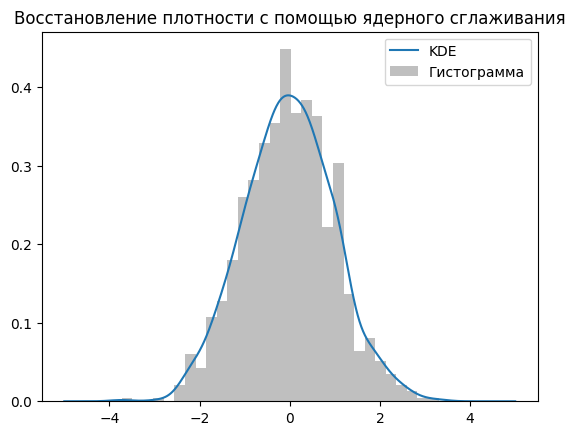

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from scipy.stats import gaussian_kde
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.special import kl_div

data = np.random.normal(loc=0, scale=1, size=1000)

# Оценка плотности с использованием ядерного сглаживания
kde = gaussian_kde(data)
x = np.linspace(-5, 5, 1000)
density = kde(x)

# Визуализация результата
plt.plot(x, density, label='KDE')
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Гистограмма')
plt.legend()
plt.title("Восстановление плотности с помощью ядерного сглаживания")
plt.show()

##1.2.Реализуйте метод восстановления плотности методом ядерного сглаживания

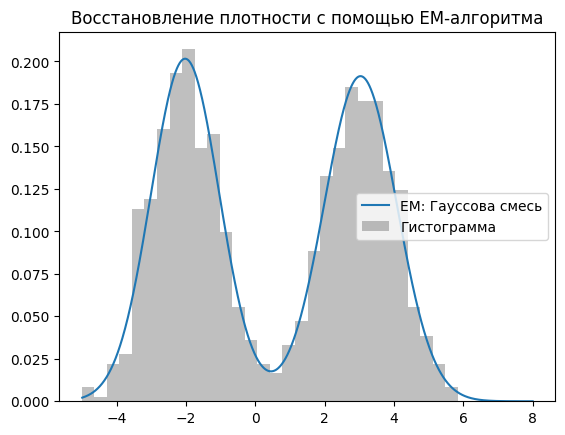

In [32]:


# Сгенерируем данные (например, из двух различных нормальных распределений)
data = np.concatenate([np.random.normal(-2, 1, 500), np.random.normal(3, 1, 500)])

# Применяем EM алгоритм для оценки модели Гауссовой смеси
gmm = GaussianMixture(n_components=2)
gmm.fit(data.reshape(-1, 1))

# Оценка плотности
x = np.linspace(-5, 8, 1000).reshape(-1, 1)
density = np.exp(gmm.score_samples(x))

# Визуализация результата
plt.plot(x, density, label='EM: Гауссова смесь')
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Гистограмма')
plt.legend()
plt.title("Восстановление плотности с помощью EM-алгоритма")
plt.show()

##2.Возьмите любой набор случайных точек в любой библиотеке, например Sci-learn mkbpx и визуализируйте эти данные и ту плотность, котораая будет восстановлена вашими методами

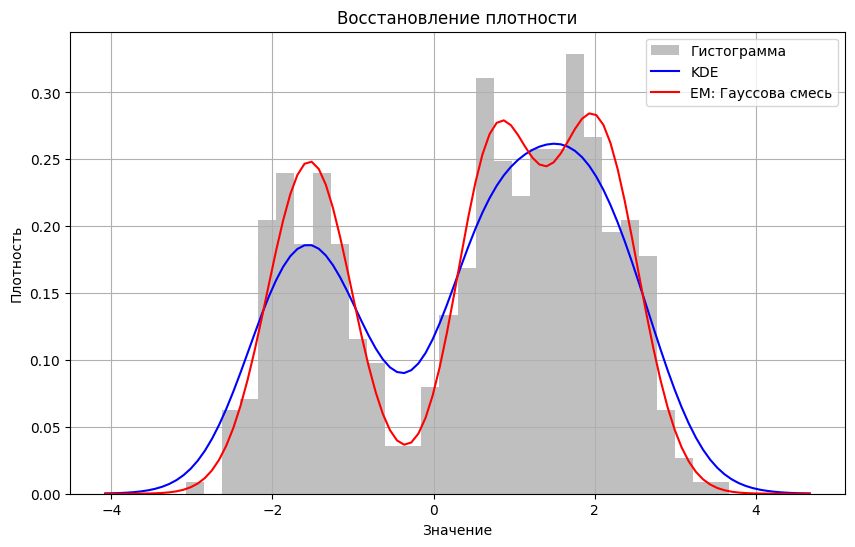

In [33]:


n_samples = 500
centers = 3
X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=0.60, random_state=0)

# Упрощаем X для использования, так как нас интересует только первый признак
data = X[:, 0]

# Шаг 2: Ядерное сглаживание
kde = gaussian_kde(data)
x_kde = np.linspace(data.min() - 1, data.max() + 1, 100)
density_kde = kde(x_kde)

# Шаг 3: EM-Алгоритм для Гауссовой смеси
gmm = GaussianMixture(n_components=centers)
gmm.fit(data.reshape(-1, 1))

# Оценим плотность с помощью EM
density_gmm = np.exp(gmm.score_samples(x_kde.reshape(-1, 1)))

# Шаг 4: Визуализация
plt.figure(figsize=(10, 6))

# Гистограмма
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Гистограмма')

# Линия для ядерного сглаживания
plt.plot(x_kde, density_kde, label='KDE', color='blue')

# Линия для EM-алгоритма
plt.plot(x_kde, density_gmm, label='EM: Гауссова смесь', color='red')

plt.legend()
plt.title("Восстановление плотности")
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.grid()
plt.show()

##3. Реализуйте меот метрополиса-гастинга для несимметричного
##4. Реализуйте метод гиббса

##5. Примените два этих метода на основе той функции плотности, которая была восстановлена на предыдущем пункте, тем самым вы получите другой набор точек.

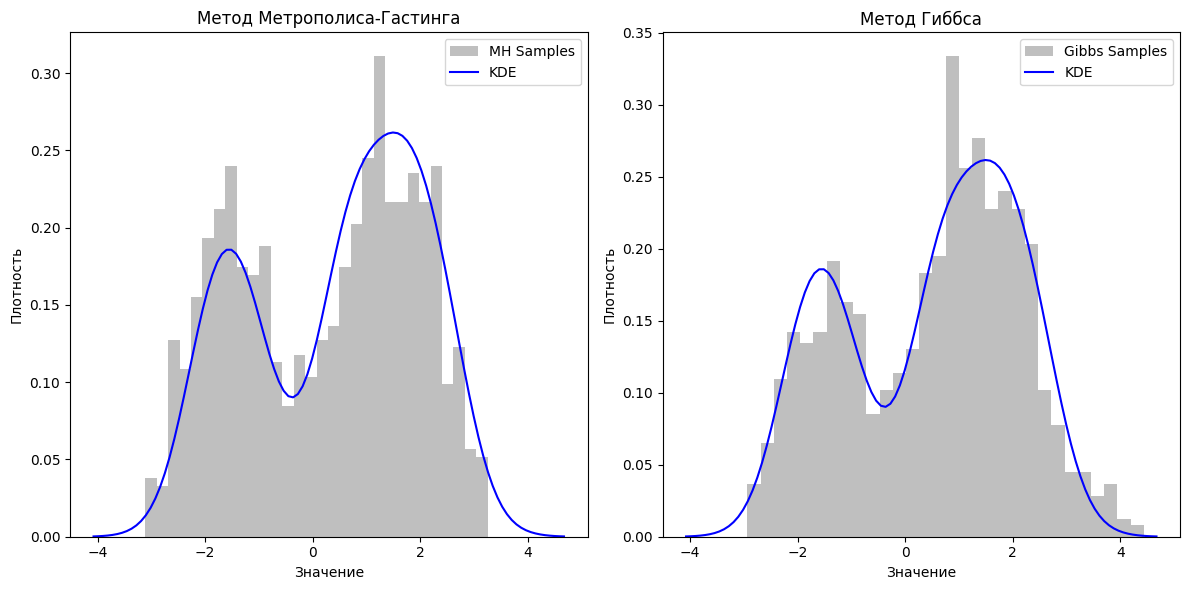

In [34]:

# Функция для метода Метрополиса-Гастинга
def metropolis_hastings(target_density, proposal_func, proposal_width, n_samples):
    samples = []
    current_sample = np.random.uniform(low=x_kde.min(), high=x_kde.max())

    for _ in range(n_samples):
        # Предлагаем новый кандидат на выборку
        proposed_sample = np.random.normal(current_sample, proposal_width)

        # Рассчитываем вероятности
        acceptance_ratio = (target_density(proposed_sample) * proposal_func(current_sample, proposed_sample)) / \
                           (target_density(current_sample) * proposal_func(proposed_sample, current_sample))

        # Принимаем новый образец или остаемся в текущем
        if np.random.rand() < acceptance_ratio:
            current_sample = proposed_sample

        samples.append(current_sample)

    return np.array(samples)

# Функция для метода Гиббса (одномерный случай)
def gibbs_sampling(target_density, n_samples):
    samples = []
    current_sample = np.random.uniform(low=data.min(), high=data.max())

    for _ in range(n_samples):
        # Условное распределение: используем ту же плотность как отображение
        # мы просто используем target_density как вероятностную функцию
        proposal = np.random.normal(current_sample, 1)  # Нормальное распределение для предложения
        if np.random.random() < (target_density(proposal) / target_density(current_sample)):
            current_sample = proposal

        samples.append(current_sample)

    return np.array(samples)

# Шаг 3: Применение методов
n_new_samples = 1000

# Метод Метрополиса-Гастинга
mh_samples = metropolis_hastings(lambda x: kde(x), lambda x, y: 1/(np.sqrt(2 * np.pi) * 1), proposal_width=1, n_samples=n_new_samples)

# Метод Гиббса
gibbs_samples = gibbs_sampling(lambda x: kde(x), n_samples=n_new_samples)

# Шаг 4: Визуализация
plt.figure(figsize=(12, 6))

# График для выборки Метрополиса-Гастинга
plt.subplot(1, 2, 1)
plt.hist(mh_samples, bins=30, density=True, alpha=0.5, color='gray', label='MH Samples')
plt.plot(x_kde, density_kde, label='KDE', color='blue')
plt.title('Метод Метрополиса-Гастинга')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# График для выборки Гиббса
plt.subplot(1, 2, 2)
plt.hist(gibbs_samples, bins=30, density=True, alpha=0.5, color='gray', label='Gibbs Samples')
plt.plot(x_kde, density_kde, label='KDE', color='blue')
plt.title('Метод Гиббса')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

plt.tight_layout()
plt.show()

##6. Визуализировать 2 набора точек двумя разными цветами, сравнить с началом, и показать, где ошибки.

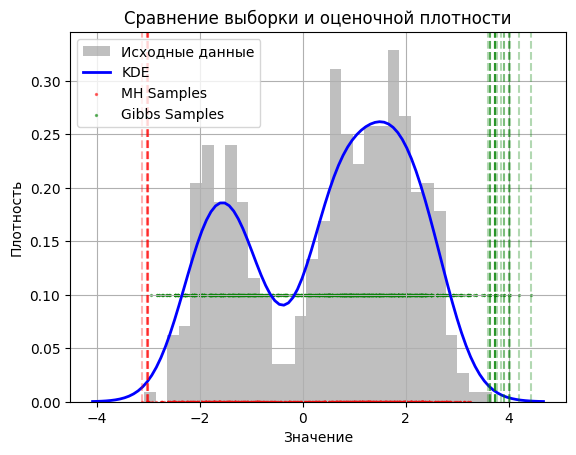

In [35]:


# Гистограмма исходных данных
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Исходные данные')

# Оценочная плотность
plt.plot(x_kde, density_kde, label='KDE', color='blue', linewidth=2)

# Точки выборки из Метрополиса-Гастинга
plt.scatter(mh_samples, np.zeros_like(mh_samples), color='red', label='MH Samples', alpha=0.5, s=2)

# Точки выборки из метода Гиббса
plt.scatter(gibbs_samples, np.zeros_like(gibbs_samples) + 0.1, color='green', label='Gibbs Samples', alpha=0.5, s=2)

# Более толстые линии указывают на ошибки
for sample in mh_samples:
    if kde(sample) < 0.02:  # Сравниваем с некоторым порогом
        plt.axvline(sample, color='red', linestyle='--', alpha=0.3)

for sample in gibbs_samples:
    if kde(sample) < 0.02:  # Сравниваем с некоторым порогом
        plt.axvline(sample, color='green', linestyle='--', alpha=0.3)

plt.legend()
plt.title("Сравнение выборки и оценочной плотности")
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.grid()
plt.show()

##7*. Нарисовать отдельно картинку блуждания в случае трёхмерной функции плотности (метод метрополиса гастингса).

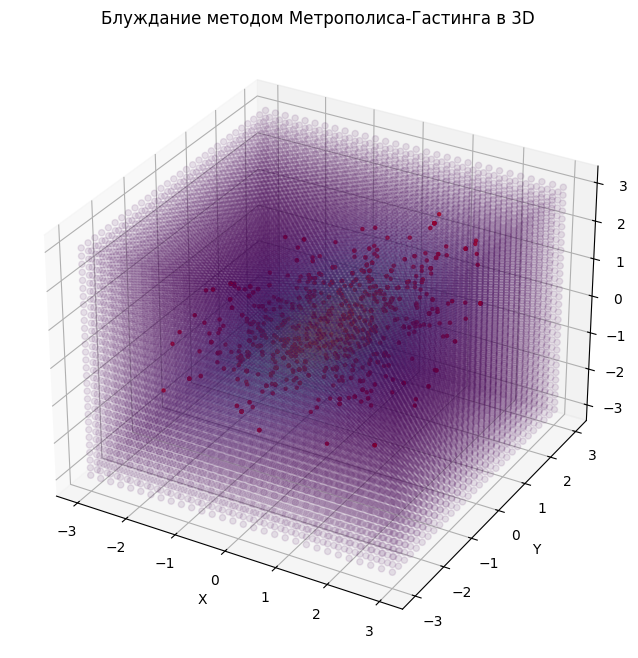

In [36]:

# Шаг 1: Определение 3D функции плотности
mean = [0, 0, 0]
cov = [[1, 0.5, 0.3], [0.5, 1, 0.5], [0.3, 0.5, 1]]  # Ковариационная матрица
data = multivariate_normal(mean=mean, cov=cov).rvs(size=500)

# Оценка плотности
def density_func(x, y, z):
    pos = np.array([x, y, z]).T
    return multivariate_normal.pdf(pos, mean=mean, cov=cov)

# Шаг 2: Метод Метрополиса-Гастинга
def metropolis_hastings_3d(target_density, n_samples):
    samples = []
    # Начальная точка
    current_sample = np.random.multivariate_normal(mean, cov)

    for _ in range(n_samples):
        proposed_sample = np.random.multivariate_normal(current_sample, 0.5 * np.identity(3))

        acceptance_ratio = target_density(*proposed_sample) / target_density(*current_sample)

        if np.random.rand() < acceptance_ratio:
            current_sample = proposed_sample

        samples.append(current_sample)

    return np.array(samples)

# Шаг 3: Применение метода
n_new_samples = 1000
mh_samples_3d = metropolis_hastings_3d(density_func, n_samples=n_new_samples)

# Шаг 4: Визуализация 3D блуждания
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Создание сетки для функции плотности
x = np.linspace(-3, 3, 30)
y = np.linspace(-3, 3, 30)
z = np.linspace(-3, 3, 30)
X, Y, Z = np.meshgrid(x, y, z)
density = density_func(X.flatten(), Y.flatten(), Z.flatten()).reshape(X.shape)

# Визуализация функции плотности
ax.scatter(X, Y, Z, c=density, cmap='viridis', alpha=0.1)

# Визуализация точек выборки
ax.scatter(mh_samples_3d[:, 0], mh_samples_3d[:, 1], mh_samples_3d[:, 2], color='red', marker='o', alpha=0.8, s=5)

# Настройка графика
ax.set_title('Блуждание методом Метрополиса-Гастинга в 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

##8* Нужно сравнить красный и синий набор точек вероятностными методами, KL-дивергенция.

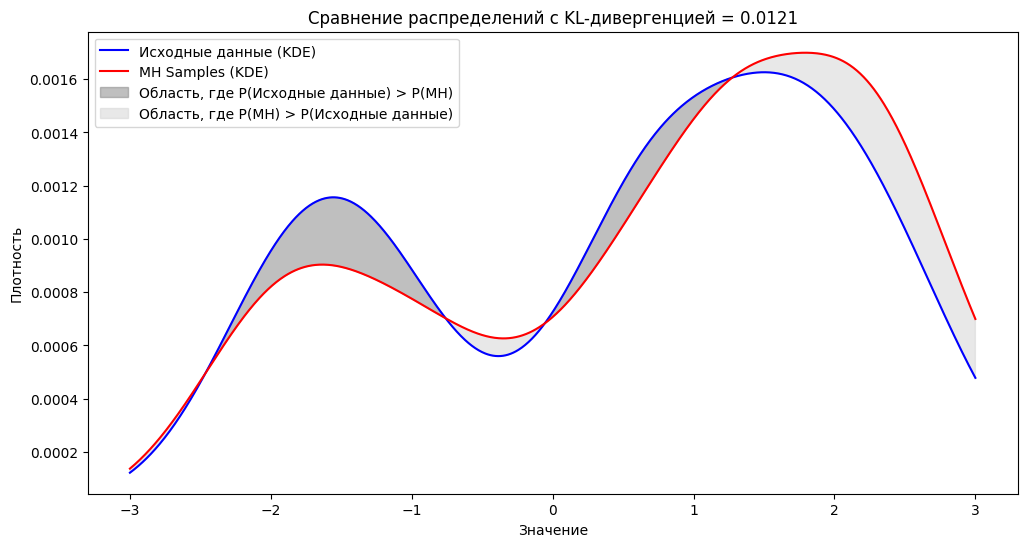

In [38]:




# Оценка плотности для исходных данных
kde_original = gaussian_kde(data, bw_method='scott')

# Генерация выборок методом Метрополиса-Гастинга
def density_func(x):
    return kde_original(x)

def metropolis_hastings(target_density, n_samples):
    samples = []
    current_sample = np.random.uniform(low=data.min(), high=data.max())
    for _ in range(n_samples):
        proposed_sample = np.random.normal(current_sample, 1)
        acceptance_ratio = (target_density(proposed_sample)) / (target_density(current_sample))
        if np.random.rand() < acceptance_ratio:
            current_sample = proposed_sample
        samples.append(current_sample)
    return np.array(samples)

mh_samples = metropolis_hastings(density_func, n_samples=1000)

# Шаг 2: Оценка плотности для выборки Метрополиса-Гастинга
kde_mh = gaussian_kde(mh_samples, bw_method='scott')

# Дискретизация для оценки плотности
x_grid = np.linspace(-3, 3, 1000)
p_original = kde_original(x_grid)
p_mh = kde_mh(x_grid)

# Нормализация оценки плотности
p_original /= np.sum(p_original)
p_mh /= np.sum(p_mh)

# Шаг 3: Вычисление KL-дивергенции
kl_divergence = np.sum(kl_div(p_original, p_mh))  # KL-первое распределение - p_original, второе - p_mh

# Шаг 4: Визуализация
plt.figure(figsize=(12, 6))
plt.plot(x_grid, p_original, label='Исходные данные (KDE)', color='blue')
plt.plot(x_grid, p_mh, label='MH Samples (KDE)', color='red')
plt.fill_between(x_grid, p_original, p_mh, where=(p_original > p_mh), color='gray', alpha=0.5,  label='Область, где P(Исходные данные) > P(MH)')
plt.fill_between(x_grid, p_original, p_mh, where=(p_original < p_mh), color='lightgray', alpha=0.5, interpolate=True, label='Область, где P(MH) > P(Исходные данные)')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title(f'Сравнение распределений с KL-дивергенцией = {kl_divergence:.4f}')
plt.legend()
plt.show()